<a href = "https://www.mobilefish.com/services/record_mouse_coordinates/record_mouse_coordinates.php"> Get the coordinates!</a>

## Importing dependencies

In [1]:
%%time
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
from scipy import interpolate
from IPython.display import HTML

plt.style.use('dark_background')           #plt.style.available to see the options

Wall time: 16.9 s


## Cleaning and reading the data

In [2]:
def read_data(csv, header=None):
    df = pd.read_csv(csv, header=header)
    df.rename(columns={0:'X', 1:'Y'}, inplace=True)
    df['Xr'] = df['X'].apply(lambda x: x-df['X'].min())       # relative coordinates
    df['Yr'] = df['Y'].apply(lambda x: x-df['Y'].min())
    df_ = pd.DataFrame()
    df_['xr'] = df['Xr']
    df_['yr'] = -df['Yr']
    return df_

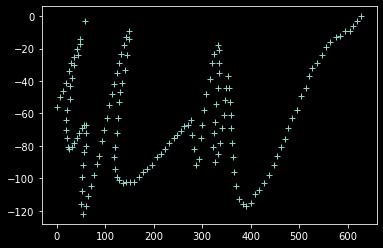

In [4]:
df_ = read_data('signature_coordinates/elon.txt')                                  # rv.txt contains the coordinates
plt.plot(df_['xr'], df_['yr'], '+')

## Cubic B-spline curve evaluation

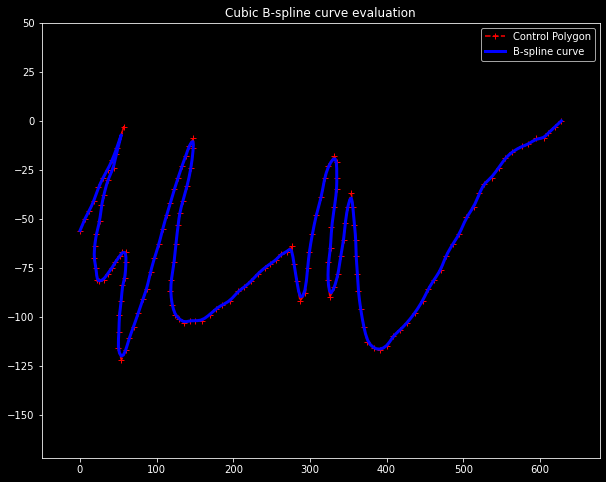

In [5]:
x = df_['xr'].values
y = df_['yr'].values

plt.figure(figsize=(10, 8))

t = np.append([0,0,0], np.linspace(0, 1, len(x)-2, endpoint=True))
t = np.append(t, [1,1,1])                                   # knots
tck = [t, [x,y], 3]
u = np.linspace(0,1,(max(2*len(x), 50)),endpoint=True)      # For B-spline, we need a second parameter u
coordinates = interpolate.splev(u,tck)                      # evaluating the curve

plt.plot(x, y, 'r--', label='Control Polygon', marker='+', markerfacecolor='w')
plt.plot(coordinates[0], coordinates[1], 'b', linewidth=3, label='B-spline curve')
plt.legend(loc='best')
plt.axis([min(x)-50, max(x)+50, min(y)-50, max(y)+50])
plt.title('Cubic B-spline curve evaluation')
plt.show()

## Animation

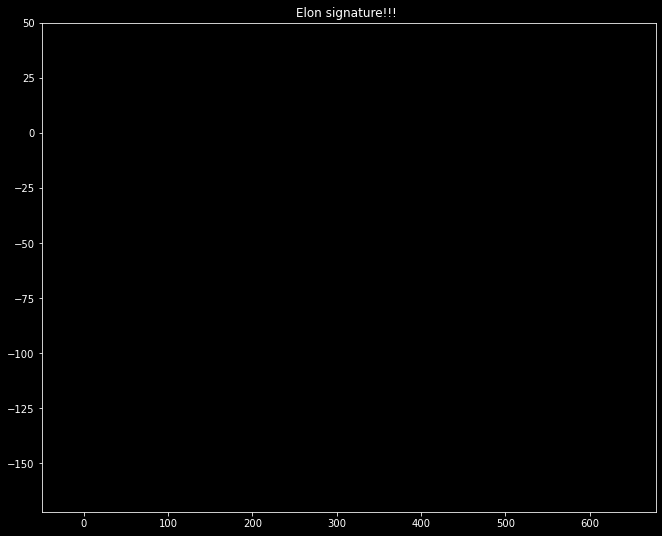

In [6]:
fig, ax = plt.subplots(figsize=(11,9))
ax.set(xlim=(-50, x.max()+50), ylim=(y.min()-50,50))
ax.set_title('Elon signature!!! ')
ax.grid(False)
line, = ax.plot([], [], 'b', linewidth=3)

In [7]:
def animate(i):
    line.set_data(coordinates[0][:i], coordinates[1][:i])
    return line,

anim = FuncAnimation(fig, animate, frames=len(coordinates[0])+1, interval=20, blit=True)

In [8]:
%%time
HTML(anim.to_html5_video())

Wall time: 24.8 s


In [9]:
anim.save('../Animation/elon.gif', fps=25)

---